In [ ]:
Мышковец С.А., v.01 23.11.2022

**Решение задачи:**
    
Решить задачу регрессии. Получить максимальную метрику качества (R2, RMSE). 

Задачи:
    
- Изучить и очистить датасет, если необходимо.
- Построить модели регрессии, предсказывающие недельные продажи относительно одного или нескольких признаков.
- Оценить качество моделей и сравнить их метрики (R2, RMSE, etc.)

**Вывод:**
    
Лучший показатель r2 дал RandomForestRegressor (0.97).

| Metrics | LinearRegression | RandomForestRegressor
| ----------- | ----------- |----------- 
| MSE | 0.015 |0.008
| RMSE |  0.12 |0.092
| MAE | 0.07 |0.0487
| r2 |  0.95 |0.97


**Description:**
    
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

**Data fields**

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# 1. Осуществить корректную загрузку данных

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 50)
df = pd.read_csv("Walmart.csv", sep= ',')

In [2]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df['Weekly_Sales, mln'] = df['Weekly_Sales']/1000000

In [4]:
df = df.drop(['Weekly_Sales'], axis=1)

In [5]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Day'] = df['Date'].apply(lambda x: x.day) 
df['Month'] = df['Date'].apply(lambda x: x.month) 
df['Year'] = df['Date'].apply(lambda x: x.year) 
df['DOW'] = df['Date'].apply(lambda x: x.isoweekday())

C:\Users\myshk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\myshk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\myshk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\myshk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [6]:
df = df.drop(['Date'], axis=1)

In [7]:
df.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,"Weekly_Sales, mln",Day,Month,Year,DOW
0,1,0,42.31,2.572,211.096358,8.106,1.643691,2,5,2010,7
1,1,1,38.51,2.548,211.242170,8.106,1.641957,2,12,2010,4
2,1,0,39.93,2.514,211.289143,8.106,1.611968,19,2,2010,5
3,1,0,46.63,2.561,211.319643,8.106,1.409728,26,2,2010,5
4,1,0,46.50,2.625,211.350143,8.106,1.554807,3,5,2010,1


In [8]:
df = df.astype({'Store': 'category'})

In [9]:
df = df.astype({'DOW': 'category'})

# 2. Удалить дубликаты

In [10]:
df.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Weekly_Sales, mln', 'Day', 'Month', 'Year', 'DOW'],
      dtype='object')

In [11]:
column_names = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Weekly_Sales, mln', 'Day', 'Month', 'Year', 'DOW']

In [12]:
duplicates = df.duplicated(subset=column_names, keep=False)

In [13]:
df[duplicates].sort_values(by='Store')

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,"Weekly_Sales, mln",Day,Month,Year,DOW


Дубликатов нет.

# 3. Осуществить разведывательный анализ данных:

## Проанализировать пропуски и решить, что с ними делать

In [14]:
df.describe()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,"Weekly_Sales, mln",Day,Month,Year
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,0.069930,60.663782,3.358607,171.578394,7.999151,1.046965,15.650350,6.475524,2010.965035
std,0.255049,18.444933,0.459020,39.356712,1.875885,0.564367,8.753908,3.321797,0.797019
min,0.000000,-2.060000,2.472000,126.064000,3.879000,0.209986,1.000000,1.000000,2010.000000
25%,0.000000,47.460000,2.933000,131.735000,6.891000,0.553350,8.000000,4.000000,2010.000000
50%,0.000000,62.670000,3.445000,182.616521,7.874000,0.960746,16.000000,6.000000,2011.000000
75%,0.000000,74.940000,3.735000,212.743293,8.622000,1.420159,23.000000,9.000000,2012.000000
max,1.000000,100.140000,4.468000,227.232807,14.313000,3.818686,31.000000,12.000000,2012.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Store              6435 non-null   category
 1   Holiday_Flag       6435 non-null   int64   
 2   Temperature        6435 non-null   float64 
 3   Fuel_Price         6435 non-null   float64 
 4   CPI                6435 non-null   float64 
 5   Unemployment       6435 non-null   float64 
 6   Weekly_Sales, mln  6435 non-null   float64 
 7   Day                6435 non-null   int64   
 8   Month              6435 non-null   int64   
 9   Year               6435 non-null   int64   
 10  DOW                6435 non-null   category
dtypes: category(2), float64(5), int64(4)
memory usage: 466.9 KB


In [16]:
df.shape

(6435, 11)

In [17]:
df.isna().sum()

Store                0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
Weekly_Sales, mln    0
Day                  0
Month                0
Year                 0
DOW                  0
dtype: int64

Пропусков нет.

## Провести анализ на выбросы и решить, что с ними делать.

<AxesSubplot:>

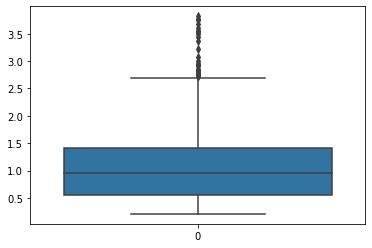

In [18]:
import seaborn as sns
sns.boxplot(data=df['Weekly_Sales, mln'], width=0.8)

<AxesSubplot:>

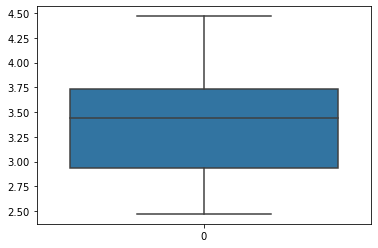

In [19]:
import seaborn as sns
sns.boxplot(data=df['Fuel_Price'], width=0.8)

<AxesSubplot:>

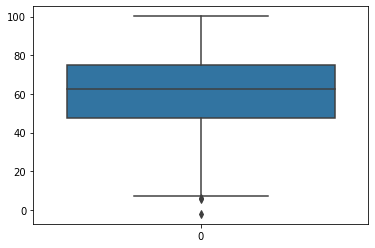

In [20]:
import seaborn as sns
sns.boxplot(data=df['Temperature'], width=0.8)

<AxesSubplot:>

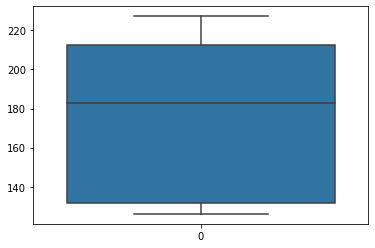

In [21]:
import seaborn as sns
sns.boxplot(data=df['CPI'], width=0.8)

<AxesSubplot:>

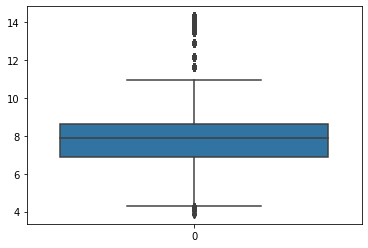

In [22]:
import seaborn as sns
sns.boxplot(data=df['Unemployment'], width=0.8)

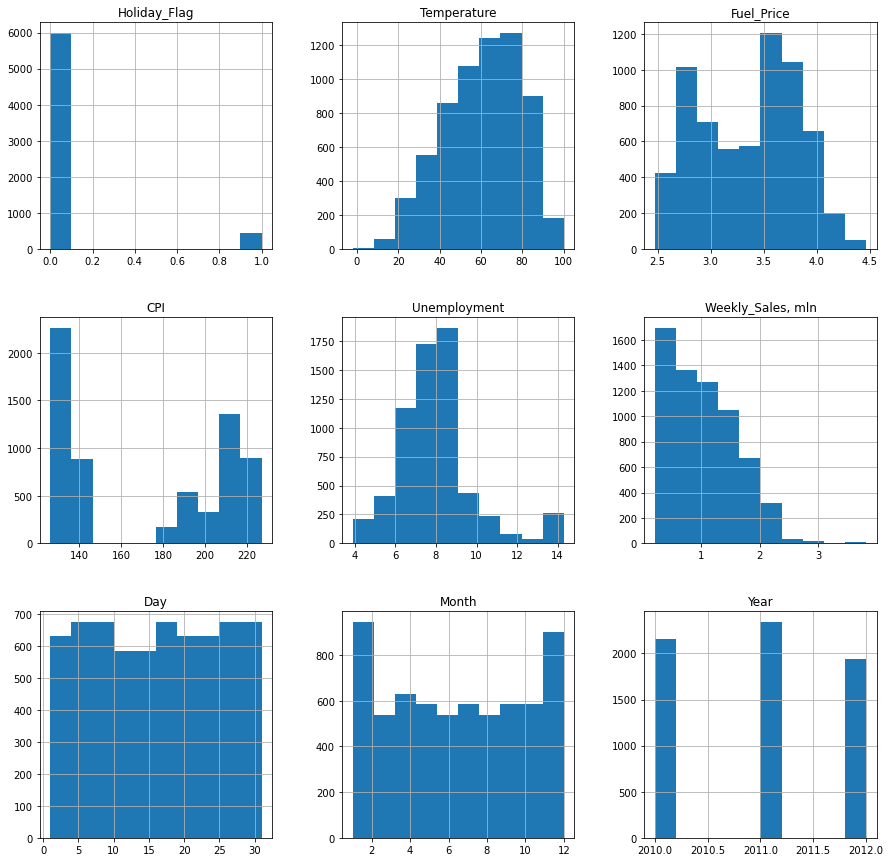

In [23]:
df.hist(figsize=(15, 15));

## Проверяем, верно ли выстален Holiday_Flag.

In [24]:
df[df['Weekly_Sales, mln'] > 3]

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,"Weekly_Sales, mln",Day,Month,Year,DOW
189,2,0,49.97,2.886,211.064660,8.163,3.436008,24,12,2010,5
241,2,0,46.66,3.112,218.999550,7.441,3.224370,23,12,2011,5
475,4,0,43.21,2.887,126.983581,7.127,3.526713,24,12,2010,5
523,4,1,47.96,3.225,129.836400,5.143,3.004702,25,11,2011,5
527,4,0,35.92,3.103,129.984548,5.143,3.676389,23,12,2011,5
1333,10,0,57.06,3.236,126.983581,9.003,3.749058,24,12,2010,5
1385,10,0,48.36,3.541,129.984548,7.874,3.487987,23,12,2011,5
1762,13,0,34.90,2.846,126.983581,7.795,3.595903,24,12,2010,5
1814,13,0,24.76,3.186,129.984548,6.392,3.556766,23,12,2011,5
1905,14,0,30.59,3.141,182.544590,8.724,3.818686,24,12,2010,5


In [25]:
df['Holiday_Flag'] = np.where((df['Holiday_Flag']==0) & (df['Weekly_Sales, mln'] > 3), 1, df['Holiday_Flag'])

In [26]:
df['Holiday_Flag'] = np.where((df['Day'].isin([16, 17, 23, 24])) & (df['Month']==12), 1, df['Holiday_Flag'])

In [27]:
df[(df['Weekly_Sales, mln'] > 2.5) & (df['Holiday_Flag']==False)]

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,"Weekly_Sales, mln",Day,Month,Year,DOW
525,4,0,31.64,3.153,129.855533,5.143,2.508955,12,9,2011,1
1859,14,0,27.31,2.784,181.871190,8.992,2.623470,2,5,2010,7
1903,14,0,30.54,3.109,182.551954,8.724,2.600519,12,10,2010,2
2761,20,0,24.27,3.109,204.687738,7.484,2.752122,12,10,2010,2
2813,20,0,41.64,3.415,211.866786,7.082,2.546124,12,9,2011,1
2830,20,0,50.06,3.996,214.238705,7.139,2.565260,4,6,2012,1


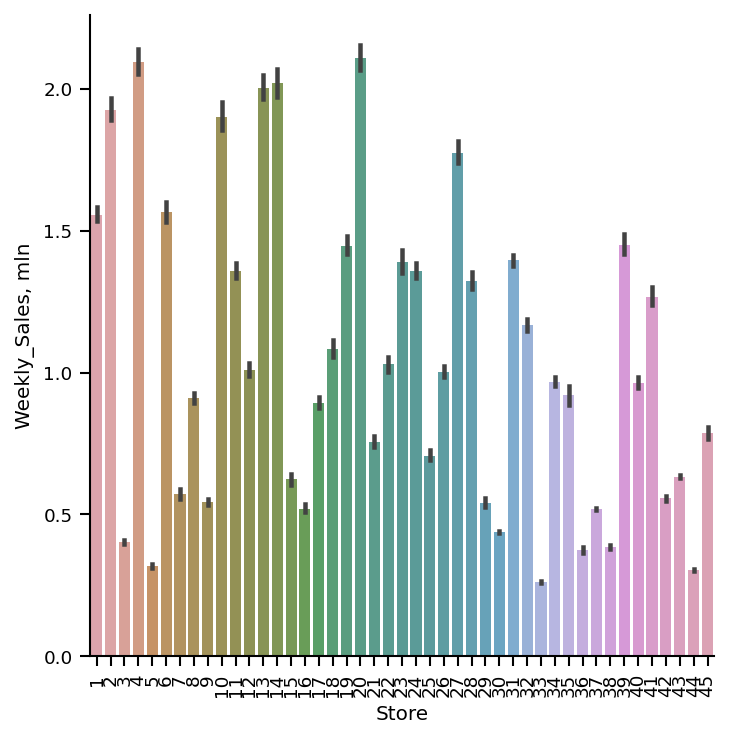

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
g = sns.catplot(data=df, y='Weekly_Sales, mln', x='Store', 
            kind='bar', saturation=0.5)
g.fig.set_dpi(150)
plt.xticks(rotation=90)
plt.show()

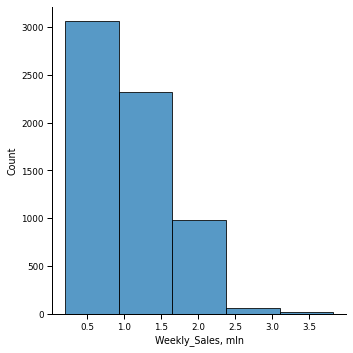

In [29]:
sns.displot(df['Weekly_Sales, mln'], bins=5)

In [30]:
group_names = ['super low', 'low', 'middle', 'high', 'super high']
df['Weekly_Sales_Group'] = pd.qcut(df['Weekly_Sales, mln'], q=5, labels=group_names)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store               6435 non-null   category
 1   Holiday_Flag        6435 non-null   int64   
 2   Temperature         6435 non-null   float64 
 3   Fuel_Price          6435 non-null   float64 
 4   CPI                 6435 non-null   float64 
 5   Unemployment        6435 non-null   float64 
 6   Weekly_Sales, mln   6435 non-null   float64 
 7   Day                 6435 non-null   int64   
 8   Month               6435 non-null   int64   
 9   Year                6435 non-null   int64   
 10  DOW                 6435 non-null   category
 11  Weekly_Sales_Group  6435 non-null   category
dtypes: category(3), float64(5), int64(4)
memory usage: 473.4 KB


# Построить модели регрессии

## Применить линейную регрессию.

In [32]:
X = df.drop(['Weekly_Sales, mln'], axis=1)

In [33]:
X = pd.get_dummies(X)

In [34]:
X.shape

(6435, 65)

In [35]:
Y = df['Weekly_Sales, mln']

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
X.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,...,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,DOW_7,Weekly_Sales_Group_super low,Weekly_Sales_Group_low,Weekly_Sales_Group_middle,Weekly_Sales_Group_high,Weekly_Sales_Group_super high
0,0,42.31,2.572,211.096358,8.106,2,5,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.51,2.548,211.242170,8.106,2,12,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,39.93,2.514,211.289143,8.106,19,2,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,46.63,2.561,211.319643,8.106,26,2,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,46.50,2.625,211.350143,8.106,3,5,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=False)

In [39]:
model.fit(X_train, y_train)

C:\Users\myshk\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [40]:
y_predict_linear = model.predict(X_test)

In [41]:
# Коэффициент детерминации
model.score(X_test, y_test)

0.9518938975603282

In [42]:
from sklearn.metrics import r2_score

print('MSE = ',mean_squared_error(y_test, y_predict_linear))
print('RMSE = ',mean_squared_error(y_test, y_predict_linear)**0.5)
print('MAE = ',mean_absolute_error(y_test, y_predict_linear))
print('r2 = ',r2_score(y_test, y_predict_linear))

MSE =  0.015497600487678237
RMSE =  0.12448935893351784
MAE =  0.07486965663355415
r2 =  0.9518938975603282


## Применить LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
x = df.drop(['Weekly_Sales_Group'], axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, df['Weekly_Sales_Group'], test_size=0.3, random_state=42)

In [46]:
model = LogisticRegression(max_iter=1000)

In [47]:
model.fit(X_train, y_train)

C:\Users\myshk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [48]:
y_predict_log = model.predict_proba(X_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

        high       0.61      0.25      0.36       422
         low       0.46      0.46      0.46       360
      middle       0.41      0.69      0.51       367
  super high       0.64      0.77      0.70       394
   super low       0.66      0.54      0.59       388

    accuracy                           0.54      1931
   macro avg       0.56      0.54      0.52      1931
weighted avg       0.56      0.54      0.52      1931



In [50]:
for line in zip( y_predict_log[:, 1], y_test ):
    print( line )
    break

(0.12692780412929336, 'middle')


In [51]:
model.score(X_test, y_test)

0.5354738477472812

## Применить RandomForestRegressor

In [52]:
X = df.drop(['Weekly_Sales, mln'], axis=1)

In [53]:
X = pd.get_dummies(X)

In [54]:
Y = df['Weekly_Sales, mln']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9745788793357776

In [57]:
y_predict_rfr = rfr.predict(X_test)
print('MSE = ',mean_squared_error(y_test, y_predict_rfr))
print('RMSE = ',mean_squared_error(y_test, y_predict_rfr)**0.5)
print('MAE = ',mean_absolute_error(y_test, y_predict_rfr))
print('r2 = ',r2_score(y_test, y_predict_rfr))

MSE =  0.00818953006008416
RMSE =  0.09049602234399123
MAE =  0.04861391035703187
r2 =  0.9745788793357776
